In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('creditcard.csv')

In [3]:
df=data.copy()

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
print('No Frauds',round(100*data['Class'].value_counts()[0]/len(data),2),'% of dataset=',data['Class'].value_counts()[0],'records')
print('Frauds',round(100*data['Class'].value_counts()[1]/len(data),2),'% of dataset=',data['Class'].value_counts()[1],'records')

No Frauds 99.83 % of dataset= 284315 records
Frauds 0.17 % of dataset= 492 records


In [6]:
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

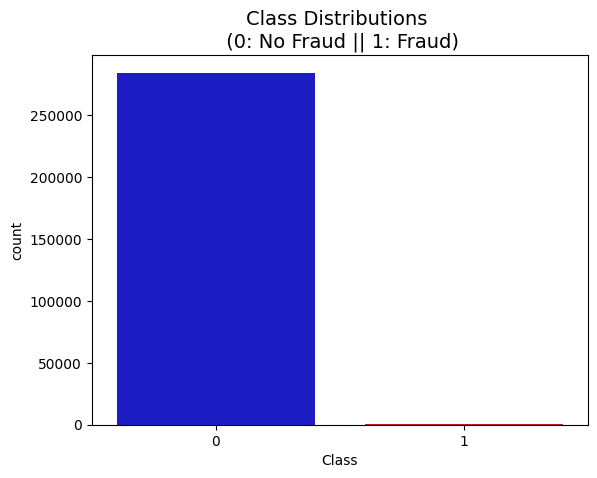

In [7]:
colors=["#0101DF", "#DF0101"]

sns.countplot(data=data, x='Class',palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show();

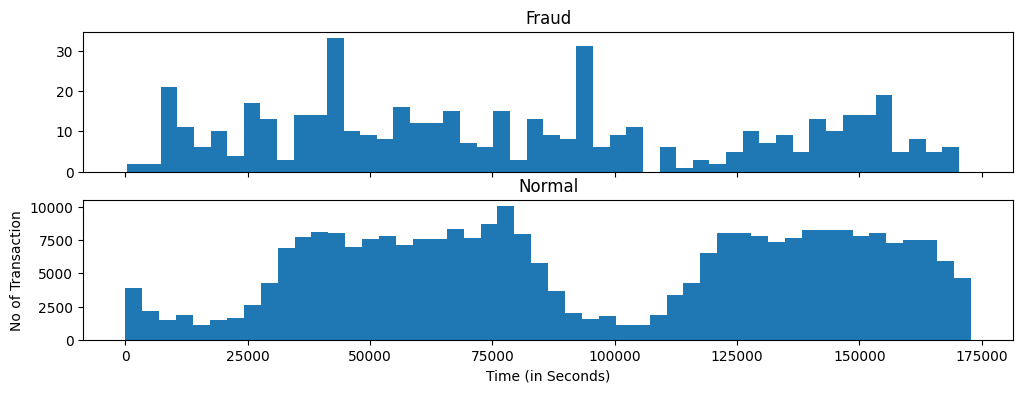

In [8]:
fig, (ax1,ax2)=plt.subplots(2,1, sharex=True, figsize=(12,4))

ax1.hist(df.Time[df.Class==1], bins=50)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class==0], bins=50)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('No of Transaction')
plt.show();

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler=MinMaxScaler(feature_range=(0,1))

df['scaled_amount']=mm_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df.drop('Amount', axis=1, inplace=True)

In [11]:
seconds_in_day=24*60*60

df['sin_time']=np.sin(2*np.pi*df.Time/seconds_in_day)
df['cos_time']=np.cos(2*np.pi*df.Time/seconds_in_day)

df.drop('Time',axis=1,inplace=True)


In [12]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

X_orig=df.drop('Class',axis=1)
Y_orig=df['Class']
df=df.sample(frac=1)

#amount of fraud classes 492 rows
fraud_df=df.loc[df['Class']==1]
non_fraud_df=df.loc[df['Class']==0][:492]

normal_distributed_df=pd.concat([fraud_df,non_fraud_df])

# shuffle the dataframe
new_df=normal_distributed_df.sample(frac=1, random_state=42)

X=new_df.drop('Class', axis=1)
Y=new_df['Class']

# Using Clustering algorithms on data as is

In [13]:
from sklearn.cluster import KMeans

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics.cluster import adjusted_rand_score



In [14]:
# Modeling the data as is using kmeans clustering

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_orig)
labels = kmeans.predict(X_orig)

kmeans_RI = adjusted_rand_score(Y_orig, labels)#calculate_rand_index(y, labels)#rand_index_score(y, labels)
print("KMeans RI score :",kmeans_RI)
f1 = f1_score(Y_orig, labels)
print("f1 score :", f1)
precision = precision_score(Y_orig, labels)
print("precision :",precision)
recall = recall_score(Y_orig, labels)
print("recall :",recall)
average_precision = average_precision_score(Y_orig, labels)
print("Average Precision-Recall Score :",average_precision)
accuracy = accuracy_score(Y_orig, labels)
print("Accuracy :",accuracy)



C:\Users\kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans RI score : -0.0001480139167940794
f1 score : 0.004754284500102921
precision : 0.0023849336149065013
recall : 0.7276422764227642
Average Precision-Recall Score : 0.0022058725785357967
Accuracy : 0.4737313338506427


In [15]:
# # Modeling the data as is using AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=2, linkage="complete").fit_predict(X)

kmeans_RI = adjusted_rand_score(Y, clustering)#calculate_rand_index(y, labels)#rand_index_score(y, labels)
print("KMeans RI score :",kmeans_RI)
f1 = f1_score(Y, clustering)
print("f1 score :", f1)
precision = precision_score(Y, clustering)
print("precision :",precision)
recall = recall_score(Y, clustering)
print("recall :",recall)
average_precision = average_precision_score(Y, clustering)
print("Average Precision-Recall Score :",average_precision)
accuracy = accuracy_score(Y, clustering)
print("Accuracy :",accuracy)

KMeans RI score : 0.0
f1 score : 0.0
precision : 0.0
recall : 0.0
Average Precision-Recall Score : 0.5
Accuracy : 0.49898373983739835


# Let's try the same clustering algorithms with oversampling of under represented(fraud) data

In [16]:
from sklearn.utils import resample

X_new=df.copy()

# seperate minority and majority classes
fraud=X_new[X_new.Class==1]
not_fraud=X_new[X_new.Class==0]

# upsampling the minority class
fraud_upsampled=resample(fraud, replace=True, n_samples=len(not_fraud), random_state=27)

# combining majority and upsampled minority class
upsampled=pd.concat([not_fraud, fraud_upsampled])

#seperationg input and output for kmeans
y_upsampled=upsampled.Class
x_upsampled=upsampled.drop('Class', axis=1)

# For AGNEST
upsampled=upsampled.sample(frac=1, random_state=27)

fraud_df=upsampled.loc[upsampled.Class==1][:900]
not_fraud_df=upsampled.loc[upsampled.Class==0][:900]

new_df=pd.concat([fraud_df,not_fraud_df])

# shuffle the dataframe rows
new_df=new_df.sample(frac=1, random_state=27)

X_agnest=new_df.drop('Class', axis=1)
y_agnest=new_df.Class

In [17]:
# Modeling the upsampled data as kmeans

kmeans=KMeans(n_clusters=2)
kmeans.fit(x_upsampled)
labels=kmeans.predict(x_upsampled)

kmeans_RI=adjusted_rand_score(y_upsampled,labels)
print('Kmeans RI score:',kmeans_RI)
f1 = f1_score(y_upsampled, labels)
print("f1 score :", f1)
precision=precision_score(y_upsampled,labels)
print('precision score:',precision)
recall=recall_score(y_upsampled,labels)
print('recall score:',recall)
average_precision=average_precision_score(y_upsampled,labels)
print('average precision score:',average_precision)
accuracy=accuracy_score(y_upsampled,labels)
print('accuracy score:',accuracy)

C:\Users\kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans RI score: 0.10502743515285781
f1 score : 0.4896075129740095
precision score: 0.9996421096012233
recall score: 0.3241967536007597
average precision score: 0.6619823498949515
accuracy score: 0.6620403425777747


In [18]:
# Modeling the upsampled data as agnest

clustering = AgglomerativeClustering(n_clusters=2, linkage="complete").fit_predict(X_agnest)

kmeans_RI=adjusted_rand_score(y_agnest,clustering)
print('Kmeans RI score:',kmeans_RI)
f1 = f1_score(y_agnest, clustering)
print("f1 score :", f1)
precision=precision_score(y_agnest,clustering)
print('precision score:',precision)
recall=recall_score(y_agnest,clustering)
print('recall score:',recall)
average_precision=average_precision_score(y_agnest,clustering)
print('average precision score:',average_precision)
accuracy=accuracy_score(y_agnest,clustering)
print('accuracy score:',accuracy)

Kmeans RI score: 0.00046940804625782964
f1 score : 0.04347826086956522
precision score: 1.0
recall score: 0.022222222222222223
average precision score: 0.5111111111111111
accuracy score: 0.5111111111111111


# Let's try the same clustering algorithms with undersampling of over represented(fraud) data

In [19]:
not_fraud_downsampled=resample(not_fraud, replace=True, n_samples=len(fraud), random_state=27)

# downsampling the majority class
downsampled=pd.concat([not_fraud_downsampled,fraud])

y_undersampled=downsampled.Class
x_undersampled=downsampled.drop('Class', axis=1)

In [20]:
# Modeling the downsampled data as kmeans

kmeans=KMeans(n_clusters=2)
kmeans.fit(x_undersampled)
labels=kmeans.predict(x_undersampled)

kmeans_RI=adjusted_rand_score(y_undersampled,labels)
print('Kmeans RI score:',kmeans_RI)
f1 = f1_score(y_undersampled, labels)
print("f1 score :", f1)
precision=precision_score(y_undersampled,labels)
print('precision score:',precision)
recall=recall_score(y_undersampled,labels)
print('recall score:',recall)
average_precision=average_precision_score(y_undersampled,labels)
print('average precision score:',average_precision)
accuracy=accuracy_score(y_undersampled,labels)
print('accuracy score:',accuracy)

Kmeans RI score: 0.1052614086510997
f1 score : 0.49079754601226994
precision score: 1.0
recall score: 0.3252032520325203
average precision score: 0.6626016260162602
accuracy score: 0.6626016260162602


C:\Users\kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
# Modeling the downsampled data as agglomerative clustering

clustering = AgglomerativeClustering(n_clusters=2, linkage="complete").fit_predict(x_undersampled)

kmeans_RI=adjusted_rand_score(y_undersampled,clustering)
print('Kmeans RI score:',kmeans_RI)
f1 = f1_score(y_undersampled, clustering)
print("f1 score :", f1)
precision=precision_score(y_undersampled,clustering)
print('precision score:',precision)
recall=recall_score(y_undersampled,clustering)
print('recall score:',recall)
average_precision=average_precision_score(y_undersampled,clustering)
print('average precision score:',average_precision)
accuracy=accuracy_score(y_undersampled,clustering)
print('accuracy score:',accuracy)

Kmeans RI score: 0.0003721959661186011
f1 score : 0.0398406374501992
precision score: 1.0
recall score: 0.02032520325203252
average precision score: 0.5101626016260163
accuracy score: 0.5101626016260162


# Lets try over-sampling the under-represented class using SMOTE(Synthetic Minority Over-sampling Technique) algorithm

In [22]:
from imblearn.over_sampling import SMOTE

# sepreate input features andd target
y=df.Class
X=df.drop('Class', axis=1)

sm=SMOTE(random_state=27)
X_smote, y_smote=sm.fit_resample(X,y)

X_agnest=X_smote[:500]
y_agnest=y_smote[:500]

In [23]:
# Modeling the upsampled data using  kmeans and SMOTE

kmeans=KMeans(n_clusters=2)
kmeans.fit(X_smote)
labels=kmeans.predict(X_smote)

kmeans_RI=adjusted_rand_score(y_smote,labels)
print('Kmeans RI score:',kmeans_RI)
f1 = f1_score(y_smote, labels)
print("f1 score :", f1)
precision=precision_score(y_smote,labels)
print('precision score:',precision)
recall=recall_score(y_smote,labels)
print('recall score:',recall)
average_precision=average_precision_score(y_smote,labels)
print('average precision score:',average_precision)
accuracy=accuracy_score(y_smote,labels)
print('accuracy score:',accuracy)

C:\Users\kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans RI score: 0.10537423909025172
f1 score : 0.5048449485002353
precision score: 0.4031087343130277
recall score: 0.6752686281061498
average precision score: 0.4345723679440897
accuracy score: 0.3376923482756801


In [24]:
# Modeling the upsampled data using agnest and SMOTE

clustering = AgglomerativeClustering(n_clusters=2, linkage="complete").fit_predict(X_agnest)

kmeans_RI=adjusted_rand_score(y_agnest,clustering)
print('Kmeans RI score:',kmeans_RI)
f1 = f1_score(y_agnest, clustering)
print("f1 score :", f1)
precision=precision_score(y_agnest,clustering)
print('precision score:',precision)
recall=recall_score(y_agnest,clustering)
print('recall score:',recall)
average_precision=average_precision_score(y_agnest,clustering)
print('average precision score:',average_precision)
accuracy=accuracy_score(y_agnest,clustering)
print('accuracy score:',accuracy)

Kmeans RI score: 0.0
f1 score : 0.0
precision score: 0.0
recall score: 0.0
average precision score: -0.0
accuracy score: 0.998


C:\Users\kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
